Tarea 1: memoria de cálculo

In [42]:
# Importar librerías necesarias

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

In [43]:
# Funciones matemáticas útiles

# Funciones matemáticas

def sen(x):
    return np.sin(np.deg2rad(x))

def cos(x):
    return np.cos(np.deg2rad(x))

def tan(x):
    return np.tan(np.deg2rad(x))

def arcos(x):
    return np.rad2deg(np.arccos(x))

def adsin(x):
    return np.rad2deg(np.arcsin(x))

def adtan(x):
    return np.rad2deg(np.arctan(x))


# Funciones útiles para geometría solar

def declinacion(dia):
    return 23.45*sen(360*(284+dia)/366)

def ecuacion_del_tiempo(dia):
    b = (dia-1)*360/365
    E = 229.2*10**(-5)*(7.5+186*cos(b)-3200.7*sen(b)-1461.5*cos(2*b)-4089*sen(2*b))
    return E

def long_std(utc):
    return (utc)*15

def t_solar(t_local, long_loc, long_std, dia):
    return t_local*60+4*(long_loc-long_std)+ecuacion_del_tiempo(dia)

def ang_horario(t):
    return -180+t*15/60

def cenit_solar(lat, dec, w):
    return np.rad2deg(np.arccos(cos(lat)*cos(dec)*cos(w)+sen(lat)*sen(dec)))

def azimut_solar(w, cen, dec, lat):
    return np.rad2deg(np.sign(w)*np.abs(np.arccos((cos(cen)*sen(lat)-sen(dec))/(sen(cen)*cos(lat)))))+180

def incidencia(cenit, beta, azimut, acip):
    return np.rad2deg(np.arccos(cos(cenit)*cos(beta)+sen(cenit)*sen(beta)*cos(azimut-acip)))

Pregunta 1

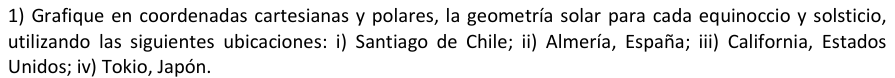

In [44]:
año = pd.date_range(start='1/1/2025', end='31/12/2025', freq='d')
dias = pd.date_range(start='1/1/2025', end='31/12/2026', freq='h')
#dias
#año

In [45]:
# Santiago de Chile

longstgo = -70
latstgo = -33.5
utc = -4

solsticio_verano = pd.date_range(start='21/12/2025', end='22/12/2025', freq='h')
equinoccio_marzo = pd.date_range(start='20/3/2025', end='21/3/2025', freq='h')
solsticio_invierno = pd.date_range(start='21/6/2025', end='22/6/2025', freq='h')

solsticio_verano[1].hour

1

In [53]:
elevacion_verano = []
azimut_verano = []
indicencia_verano = []
cenit_verano = [] # lista vacía para guardar los datos

horas = list(range(0, 25)) # esto es para graficar después

for hora in solsticio_verano:
    declin = declinacion(solsticio_verano.day_of_year[0])
    tsolar = t_solar(hora.hour, longstgo, long_std(-4), solsticio_invierno.day_of_year[0])
    w = ang_horario(tsolar)
    cenit = cenit_solar(latstgo, declin, w)
    azimut = azimut_solar(w, cenit, declin, latstgo)
    incid = incidencia(cenit, 0, azimut, 0)
    

    elevacion_verano.append(90-cenit)
    azimut_verano.append(azimut)
    indicencia_verano.append(incid)
    cenit_verano.append(cenit)

"""for i in elevacion_verano:
    if i < 0:
        elevacion_verano[elevacion_verano.index(i)] = 0 # reemplazar los negativos por 0
"""

'for i in elevacion_verano:\n    if i < 0:\n        elevacion_verano[elevacion_verano.index(i)] = 0 # reemplazar los negativos por 0\n'

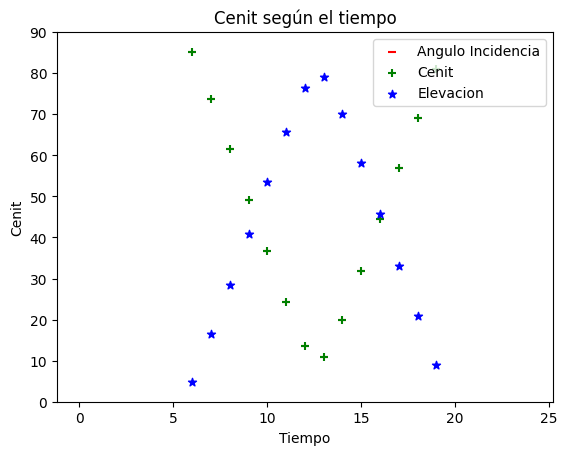

In [57]:
plt.figure()
plt.scatter(horas, indicencia_verano, label='Angulo Incidencia', c='red', marker='_')
plt.scatter(horas, cenit_verano, label='Cenit', c='green', marker='+')
plt.scatter(horas, elevacion_verano, label='Elevacion', c='blue', marker='*')
plt.xlabel('Tiempo')
plt.ylabel('Cenit')
plt.title('Cenit según el tiempo')
plt.legend(loc = 'upper right')
plt.ylim([0, 90])
plt.show()

In [48]:
horas = list(range(0, 25))